In [1]:
!where python

C:\Users\daani\Anaconda3\python.exe
C:\Users\daani\AppData\Local\Microsoft\WindowsApps\python.exe


In [2]:
%load_ext autoreload
%autoreload 2

In [19]:
#Standard imports
import os
from collections import Counter
import pickle
import sys
sys.path.append('..')

#Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Local imports
from src.localpaths import *
from src.data.make_dataset import load_training_data
from src.data.make_dataset import load_test_data
from src.models.train_model import store_model_and_results, print_model_results, load_model_results, load_pickled_models
from src.visualization.visualize import plot_learning_curve

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Load Featurized Data

In [5]:
X_train, y_train = load_training_data(final=True)

In [6]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,7,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,29,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,3,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Load model results

In [7]:
model_results = load_model_results()

In [8]:
model_results.sort_values(by="roc_auc", ascending=False)

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
2,306603145201945600.pkl,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.805940,0.805940,0.80594,0.805940,0.805940
1,183822185280526080.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.800070,0.80007,0.800070,0.800070
3,1071220852651428096.pkl,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.780194,0.774702,0.77603,0.781140,0.777541
0,1039052407272937472.pkl,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.727755,0.722075,0.72624,0.728323,0.724347


In [10]:
model = load_pickled_models("183822185280526080.pkl")

In [11]:
model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [12]:
model1 = load_pickled_models("306603145201945600.pkl")

In [13]:
model1

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
print_model_results(model, X_train, y_train)

accuracy: 0.80
precision: 0.65
recall: 0.52
f1: 0.58
roc_auc: 0.84


C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversio

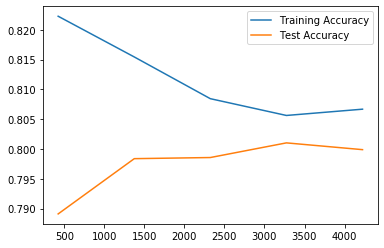

In [17]:
plot_learning_curve(model, X_train, y_train, zoom_out=False)

# Experiment with AdaBoost hyperparameters

## Experiment with number of estimators

In [23]:
model = AdaBoostClassifier(n_estimators=100)
print_model_results(model, X_train, y_train)

accuracy: 0.80
precision: 0.65
recall: 0.52
f1: 0.58
roc_auc: 0.84


## Experiment with learning rates

In [26]:
model = AdaBoostClassifier(learning_rate=10)
print_model_results(model, X_train, y_train)

accuracy: 0.26
precision: 0.26
recall: 1.00
f1: 0.42
roc_auc: 0.33


In [27]:
model = AdaBoostClassifier(learning_rate=.3)
print_model_results(model, X_train, y_train)

accuracy: 0.80
precision: 0.67
recall: 0.48
f1: 0.56
roc_auc: 0.84


In [28]:
model = AdaBoostClassifier(learning_rate=3)
print_model_results(model, X_train, y_train)

accuracy: 0.26
precision: 0.26
recall: 1.00
f1: 0.42
roc_auc: 0.67


In [31]:
model = AdaBoostClassifier(learning_rate=.6)
print_model_results(model, X_train, y_train)
store_model_and_results(model, X_train, y_train)

accuracy: 0.80
precision: 0.66
recall: 0.50
f1: 0.57
roc_auc: 0.85
fitting model before pickling
saving pickled model to 607043111193028608.pkl


C:\Users\daani\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


writing model results to existing results CSV files


In [30]:
model = AdaBoostClassifier(learning_rate=1.5)
print_model_results(model, X_train, y_train)

accuracy: 0.80
precision: 0.66
recall: 0.53
f1: 0.59
roc_auc: 0.84


# Load model results

In [32]:
model_results = load_model_results()

In [33]:
model_results.sort_values(by="roc_auc", ascending=False)

,model_filename,model_string,accuracy,precision,recall,f1,roc_auc
2,306603145201945600.pkl,"GradientBoostingClassifier(ccp_alpha=0.0, crit...",0.805940,0.805940,0.805940,0.805940,0.805940
4,607043111193028608.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800828,0.800828,0.800828,0.800828,0.800828
1,183822185280526080.pkl,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.800070,0.800070,0.800070,0.800070,0.800070
3,1071220852651428096.pkl,"RandomForestClassifier(bootstrap=True, ccp_alp...",0.780194,0.774702,0.776030,0.781140,0.777541
0,1039052407272937472.pkl,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.727755,0.722075,0.726240,0.728323,0.724347
